In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-sales-report/Car Sales.xlsx - car_data.csv


In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt
import sqlite3 # SQLite 

# Data Loading

In [4]:
# Load CSV
df = pd.read_csv('/kaggle/input/car-sales-report/Car Sales.xlsx - car_data.csv')
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [5]:
# Change date column type from object to datetime for the future use in sqlite
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23906 non-null  object        
 1   Date           23906 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  object        
 3   Gender         23906 non-null  object        
 4   Annual Income  23906 non-null  int64         
 5   Dealer_Name    23906 non-null  object        
 6   Company        23906 non-null  object        
 7   Model          23906 non-null  object        
 8   Engine         23906 non-null  object        
 9   Transmission   23906 non-null  object        
 10  Color          23906 non-null  object        
 11  Price ($)      23906 non-null  int64         
 12  Dealer_No      23906 non-null  object        
 13  Body Style     23906 non-null  object        
 14  Phone          23906 non-null  int64         
 15  Dealer_Region  2390

In [5]:
# Check for missing values
df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [6]:
#Locate the missing one
df[df['Customer Name'].isnull()]
#Drop that one
df = df.dropna()
df.isnull().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [7]:
# Connect to SQLite
conn = sqlite3.connect(":memory:") 
# Save DataFrame as a SQL table
df.to_sql("cars", conn, index=False, if_exists="replace")
# Run SQL query
query = "SELECT * FROM cars"
table = pd.read_sql_query(query, conn)
table

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02 00:00:00,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02 00:00:00,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02 00:00:00,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02 00:00:00,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02 00:00:00,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23900,C_CND_023902,2023-12-31 00:00:00,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23901,C_CND_023903,2023-12-31 00:00:00,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23902,C_CND_023904,2023-12-31 00:00:00,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23903,C_CND_023905,2023-12-31 00:00:00,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


# 1. Sales & Revenue Analysis

# What are the monthly and quarterly car sales trends?

In [8]:
query = """
SELECT 
    strftime('%Y-%m', Date) AS Month,  
    COUNT(Car_id) AS Numbers_of_sales,
    SUM("Price ($)") AS Total_Revenue
FROM 
    cars
GROUP BY 
    Month
ORDER BY 
    Total_Revenue Desc;
"""
table = pd.read_sql_query(query, conn)
table

,Month,Numbers_of_sales,Total_Revenue
0,2023-12,1921,54281601
1,2023-11,1850,51590388
2,2023-09,1830,51416962
3,2022-11,1619,45344290
4,2022-12,1625,44984458
5,2022-09,1475,42218216
6,2023-05,1145,32613157
7,2023-06,1025,28901691
8,2023-07,1025,28243030
9,2023-10,995,28043756


In [9]:
query = """
SELECT 
    strftime('%Y', Date) || 
    'Q' || ((CAST(strftime('%m', Date) AS INTEGER) - 1) / 3 + 1) AS Quarter,
    COUNT(Car_id) AS Number_of_Sales,
    SUM("Price ($)") AS Total_Revenue
FROM cars
GROUP BY Quarter
ORDER BY Total_Revenue Desc;
"""
table = pd.read_sql_query(query, conn)
table

,Quarter,Number_of_Sales,Total_Revenue
0,2023Q4,4766,133915745
1,2022Q4,4079,114320257
2,2023Q3,3750,104822268
3,2022Q3,2985,85784580
4,2023Q2,3025,85630415
5,2022Q2,2240,62961164
6,2023Q1,1720,46816692
7,2022Q1,1340,37229344


# What is the total revenue per dealer or per region?

In [10]:
query = """
SELECT 
Dealer_Name,
SUM("Price ($)") AS Total_Revenue
FROM cars
GROUP BY Dealer_Name
ORDER BY Total_Revenue DESC
"""
table = pd.read_sql_query(query, conn)
table

,Dealer_Name,Total_Revenue
0,Rabun Used Car Sales,37456655
1,Progressive Shippers Cooperative Association No,36751460
2,U-Haul CO,35876089
3,Race Car Help,35288706
4,Scrivener Performance Engineering,35258525
5,Saab-Belle Dodge,35220865
6,Star Enterprises Inc,35113206
7,Tri-State Mack Inc,35091357
8,Suburban Ford,34943473
9,Ryder Truck Rental and Leasing,34837906


In [11]:
query = """
SELECT 
Dealer_Region,
SUM("Price ($)") AS Total_Revenue
FROM cars
GROUP BY Dealer_Region
ORDER BY Total_Revenue DESC
"""
table = pd.read_sql_query(query, conn)
table

,Dealer_Region,Total_Revenue
0,Austin,117192531
1,Janesville,106351234
2,Scottsdale,95969374
3,Aurora,88642382
4,Greenville,88149602
5,Pasco,88040714
6,Middletown,87134628


# Which dealers consistently ranked in the top 5 in monthly revenue over the past 6 months?

In [12]:
query = """
WITH recent_months AS (
    SELECT DISTINCT strftime('%Y-%m', Date) AS Month
    FROM cars
    ORDER BY Month DESC
    LIMIT 6
),
monthly_revenue AS (
    SELECT 
        Dealer_Name,
        strftime('%Y-%m', Date) AS Month,
        SUM("Price ($)") AS Monthly_Revenue
    FROM cars
    GROUP BY Dealer_Name, Month
),
filtered_revenue AS (
    SELECT mr.*
    FROM monthly_revenue mr
    JOIN recent_months rm ON mr.Month = rm.Month
),
ranked_dealers AS (
    SELECT 
        Dealer_Name,
        Month,
        Monthly_Revenue,
        RANK() OVER (PARTITION BY Month ORDER BY Monthly_Revenue DESC) AS Revenue_Rank
    FROM filtered_revenue
),
top_dealers AS (
    SELECT *
    FROM ranked_dealers
    WHERE Revenue_Rank <= 5
),
consistency_score AS (
    SELECT 
        Dealer_Name,
        COUNT(*) AS Times_in_Top_5
    FROM top_dealers
    GROUP BY Dealer_Name
    ORDER BY Times_in_Top_5 DESC
)

SELECT * FROM consistency_score;
"""
table = pd.read_sql_query(query, conn)
table

,Dealer_Name,Times_in_Top_5
0,Tri-State Mack Inc,5
1,Saab-Belle Dodge,5
2,Rabun Used Car Sales,4
3,U-Haul CO,3
4,Suburban Ford,3
5,Race Car Help,3
6,Progressive Shippers Cooperative Association No,3
7,Scrivener Performance Engineering,2
8,Star Enterprises Inc,1
9,Ryder Truck Rental and Leasing,1


# 2. Customer Demographics

# What is the gender distribution of car buyers?

In [13]:
query = """
SELECT
gender,
count(Car_id) as number_of_sales
FROM cars
GROUP BY gender
"""
table = pd.read_sql_query(query, conn)
table

,Gender,number_of_sales
0,Female,5108
1,Male,18797


# What is the average annual income of buyers by region?

In [14]:
query = """
SELECT 
Dealer_Region as region,
avg("Annual Income") as avg_year_income,
count(Car_id) as buyers_count
FROM cars
GROUP BY region
"""
table = pd.read_sql_query(query, conn)
table

,region,avg_year_income,buyers_count
0,Aurora,845563.331416,3129
1,Austin,822849.572189,4135
2,Greenville,832667.512788,3128
3,Janesville,833916.268778,3821
4,Middletown,825592.651854,3128
5,Pasco,853975.290323,3131
6,Scottsdale,805682.702884,3433


# Do income levels correlate with car price?

In [15]:
query = """
SELECT
    (COUNT(*) * SUM("Annual Income" * "Price ($)") -
     SUM("Annual Income") * SUM("Price ($)")) /
    (SQRT(
        (COUNT(*) * SUM("Annual Income" * "Annual Income") - SUM("Annual Income") * SUM("Annual Income")) *
        (COUNT(*) * SUM("Price ($)" * "Price ($)") - SUM("Price ($)") * SUM("Price ($)"))
    )) AS correlation_coefficient
FROM cars;
"""
table = pd.read_sql_query(query, conn)
table

,correlation_coefficient
0,0.012075


# 3. Car & Model Trends

# What are the top-selling car models and companies?

In [16]:
query = """
SELECT
Company,
Model,
count(Car_id) as Sum
FROM cars
GROUP BY Company,Model
ORDER BY SUM DESC
LIMIT 10;
"""
table = pd.read_sql_query(query, conn)
table

,Company,Model,Sum
0,Mitsubishi,Diamante,418
1,Chevrolet,Prizm,411
2,Oldsmobile,Silhouette,411
3,Volkswagen,Passat,391
4,Dodge,Ram Pickup,382
5,Volkswagen,Jetta,382
6,Acura,RL,372
7,Lexus,LS400,354
8,Chrysler,LHS,330
9,Audi,A6,329


# Which body styles are the most popular (SUV, Hatchback, etc.)?

In [17]:
query = """
SELECT
"Body Style",
count(Car_id) as Sum
FROM cars
GROUP BY "Body Style"
ORDER BY SUM DESC
LIMIT 10;
"""
table = pd.read_sql_query(query, conn)
table

,Body Style,Sum
0,SUV,6374
1,Hatchback,6128
2,Sedan,4488
3,Passenger,3945
4,Hardtop,2970


# Is there a price difference between manual vs automatic transmission?

In [18]:
query = """
SELECT
Transmission,
ROUND(AVG("Price ($)"),2) as avg_price,
COUNT(Car_id) as cars_count
FROM cars
GROUP BY Transmission
ORDER BY cars_count DESC;
"""
table = pd.read_sql_query(query, conn)
table

,Transmission,avg_price,cars_count
0,Auto,28247.19,12570
1,Manual,27914.71,11335


# Which car models are growing the fastest in sales overall?

In [19]:
query = """
-- 1. Get monthly sales per model across the entire dataset
WITH monthly_model_sales AS (
    SELECT 
        Model,
        strftime('%Y-%m', Date) AS Month,
        COUNT(*) AS Sales
    FROM cars
    GROUP BY Model, Month
),

-- 2. Add previous month's sales using LAG()
model_with_lag AS (
    SELECT 
        Model,
        Month,
        Sales,
        LAG(Sales) OVER (PARTITION BY Model ORDER BY Month) AS Prev_Sales
    FROM monthly_model_sales
),

-- 3. Calculate growth %
growth_rates AS (
    SELECT 
        Model,
        Month,
        Sales,
        Prev_Sales,
        ROUND(100.0 * (Sales - Prev_Sales) / NULLIF(Prev_Sales, 0), 2) AS Growth_Percent
    FROM model_with_lag
    WHERE Prev_Sales IS NOT NULL
),

-- 4. Aggregate growth behavior across full dataset
model_growth_summary AS (
    SELECT 
        Model,
        COUNT(*) AS Months_Compared,
        SUM(CASE WHEN Growth_Percent > 0 THEN 1 ELSE 0 END) AS Positive_Growth_Months,
        ROUND(AVG(Growth_Percent), 2) AS Avg_Growth_Percent
    FROM growth_rates
    GROUP BY Model
)
-- 5. Return top growing models
SELECT *
FROM model_growth_summary
ORDER BY Avg_Growth_Percent DESC
LIMIT 10;
"""
table = pd.read_sql_query(query, conn)
table

,Model,Months_Compared,Positive_Growth_Months,Avg_Growth_Percent
0,LX470,22,10,102.80
1,SLK230,23,10,94.02
2,Escort,21,11,86.53
3,Carrera Cabrio,21,10,84.85
4,Golf,21,9,83.16
5,Cavalier,22,11,81.44
6,Ram Wagon,22,10,78.08
7,S80,22,8,77.84
8,Mystique,18,9,76.35
9,Xterra,19,9,71.58


# 4. Regional & Dealer Insights

# Which regions or dealers have the highest sales?

In [20]:
query = """
SELECT
Dealer_Region,
COUNT(Car_id) as count_sales
FROM cars
GROUP BY Dealer_Region
Order by count_sales DESC;
"""
table = pd.read_sql_query(query, conn)
table

,Dealer_Region,count_sales
0,Austin,4135
1,Janesville,3821
2,Scottsdale,3433
3,Pasco,3131
4,Aurora,3129
5,Middletown,3128
6,Greenville,3128


In [21]:
query = """
SELECT
Dealer_Name,
COUNT(Car_id) as count_sales
FROM cars
GROUP BY Dealer_Name
Order by count_sales DESC
LIMIT 5;
"""
table = pd.read_sql_query(query, conn)
table

,Dealer_Name,count_sales
0,Progressive Shippers Cooperative Association No,1318
1,Rabun Used Car Sales,1313
2,Race Car Help,1253
3,Saab-Belle Dodge,1250
4,Tri-State Mack Inc,1249


# Which dealers perform best in terms of volume and revenue?

In [22]:
query = """
SELECT
Dealer_Name,
COUNT(Car_id) as count_sales,
SUM("Price ($)") as total
FROM cars
GROUP BY Dealer_Name
Order by count_sales DESC
LIMIT 5;
"""
table = pd.read_sql_query(query, conn)
table

,Dealer_Name,count_sales,total
0,Progressive Shippers Cooperative Association No,1318,36751460
1,Rabun Used Car Sales,1313,37456655
2,Race Car Help,1253,35288706
3,Saab-Belle Dodge,1250,35220865
4,Tri-State Mack Inc,1249,35091357


# Which dealers have grown their sales the most quarter-over-quarter?

In [23]:
query = """
WITH dealer_quarterly_sales AS (
    SELECT 
        Dealer_Name,
        strftime('%Y', Date) AS Year,
        ((CAST(strftime('%m', Date) AS INTEGER) - 1) / 3 + 1) AS Quarter,
        COUNT(*) AS Cars_Sold
    FROM cars
    GROUP BY Dealer_Name, Year, Quarter
),

sales_with_lag AS (
    SELECT 
        Dealer_Name,
        Year,
        Quarter,
        Cars_Sold,
        LAG(Cars_Sold) OVER (
            PARTITION BY Dealer_Name 
            ORDER BY Year, Quarter
        ) AS Prev_Quarter_Sales
    FROM dealer_quarterly_sales
),

growth_calculated AS (
    SELECT 
        Dealer_Name,
        Year,
        Quarter,
        Cars_Sold,
        Prev_Quarter_Sales,
        ROUND(
            100.0 * (Cars_Sold - Prev_Quarter_Sales) / NULLIF(Prev_Quarter_Sales, 0), 2
        ) AS QoQ_Growth_Percent
    FROM sales_with_lag
    WHERE Prev_Quarter_Sales IS NOT NULL
),

latest_growth AS (
    SELECT * FROM (
        SELECT *, 
               RANK() OVER (
                   PARTITION BY Dealer_Name 
                   ORDER BY Year DESC, Quarter DESC
               ) AS rn
        FROM growth_calculated
    )
    WHERE rn = 1
)

-- FINAL RESULT
SELECT
Dealer_Name,
Year,
Quarter,
Cars_Sold,
Prev_Quarter_Sales,
QoQ_Growth_Percent
FROM latest_growth
ORDER BY QoQ_Growth_Percent DESC
LIMIT 1;
"""
table = pd.read_sql_query(query, conn)
table

,Dealer_Name,Year,Quarter,Cars_Sold,Prev_Quarter_Sales,QoQ_Growth_Percent
0,Chrysler of Tri-Cities,2023,4,137,96,42.71


# 5. Price Analysis

# Are there significant price differences by color, engine type, or body style?

In [24]:
query = """
SELECT 
    Color,
    Engine,
    "Body Style",
    "Price ($)"
FROM cars
"""
table = pd.read_sql_query(query, conn)
table

,Color,Engine,Body Style,Price ($)
0,Black,DoubleÂ Overhead Camshaft,SUV,26000
1,Black,DoubleÂ Overhead Camshaft,SUV,19000
2,Red,Overhead Camshaft,Passenger,31500
3,Pale White,Overhead Camshaft,SUV,14000
4,Red,DoubleÂ Overhead Camshaft,Hatchback,24500
...,...,...,...,...
23900,Red,Overhead Camshaft,Passenger,12000
23901,Black,DoubleÂ Overhead Camshaft,Hardtop,16000
23902,Red,Overhead Camshaft,Sedan,21000
23903,Black,DoubleÂ Overhead Camshaft,Passenger,31000


In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Q("Price ($)") ~ C(Color) + C(Engine) + C(Q("Body Style"))', data=table).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,sum_sq,df,F,PR(>F)
C(Color),8.229913e+09,2.0,18.974309,5.835772e-09
C(Engine),4.455321e+08,1.0,2.054375,1.517826e-01
"C(Q(""Body Style""))",3.674615e+10,4.0,42.359673,1.848106e-35
Residual,5.182540e+12,23897.0,NaN,NaN


# Which car models are priced significantly above or below the average for their body style?

In [26]:
query = """
-- 1. Average price per model, grouped by body style
WITH model_avg_price AS (
    SELECT 
        Model,
        "Body Style",
        AVG("Price ($)") AS Model_Avg_Price,
        COUNT(*) AS Model_Sales
    FROM cars
    GROUP BY Model, "Body Style"
),

-- 2. Average price per body style
style_avg_price AS (
    SELECT 
        "Body Style",
        AVG("Price ($)") AS Style_Avg_Price
    FROM cars
    GROUP BY "Body Style"
),

-- 3. Join and compare model avg to body style avg
model_vs_style AS (
    SELECT 
        m.Model,
        m."Body Style",
        m.Model_Avg_Price,
        m.Model_Sales,
        s.Style_Avg_Price,
        ROUND((m.Model_Avg_Price - s.Style_Avg_Price) / s.Style_Avg_Price * 100.0, 2) AS Diff_Percent
    FROM model_avg_price m
    JOIN style_avg_price s
      ON m."Body Style" = s."Body Style"
)

-- 4. Show models 20% above or below category average
SELECT *
FROM model_vs_style
WHERE ABS(Diff_Percent) >= 20
ORDER BY Diff_Percent DESC;"""
table = pd.read_sql_query(query, conn)
table

,Model,Body Style,Model_Avg_Price,Model_Sales,Style_Avg_Price,Diff_Percent
0,Catera,Hatchback,56836.933333,90,27127.035574,109.52
1,Tacoma,SUV,49695.437500,32,26767.673204,85.65
2,Tacoma,Hatchback,48174.200000,25,27127.035574,77.59
3,DeVille,SUV,46154.050000,80,26767.673204,72.42
4,SC,Hatchback,43950.136364,22,27127.035574,62.02
...,...,...,...,...,...,...
108,Sentra,Passenger,16463.886364,44,28942.031686,-43.11
109,C-Class,Hatchback,14538.414474,152,27127.035574,-46.41
110,Escort,Passenger,12901.092105,76,28942.031686,-55.42
111,Cirrus,Passenger,12727.243243,37,28942.031686,-56.03


# 6. Dealer Performance Score

In [32]:
query = """
WITH dealer_metrics AS (
    SELECT 
        Dealer_Name,
        COUNT(*) AS Sales_Volume,
        SUM("Price ($)") AS Total_Revenue,
        ROUND(AVG("Price ($)"), 2) AS Avg_Price
    FROM cars
    GROUP BY Dealer_Name
),

-- Normalize each metric (min-max scale 0-1)
min_max AS (
    SELECT 
        MIN(Sales_Volume) AS min_sales,
        MAX(Sales_Volume) AS max_sales,
        MIN(Total_Revenue) AS min_revenue,
        MAX(Total_Revenue) AS max_revenue,
        MIN(Avg_Price) AS min_price,
        MAX(Avg_Price) AS max_price
    FROM dealer_metrics
),

dealer_score AS (
    SELECT 
        d.Dealer_Name,
        d.Sales_Volume,
        d.Total_Revenue,
        d.Avg_Price,
        
        -- Min-max normalized metrics
        ROUND(1.0 * (d.Sales_Volume - m.min_sales) / NULLIF(m.max_sales - m.min_sales, 0), 3) AS norm_sales,
        ROUND(1.0 * (d.Total_Revenue - m.min_revenue) / NULLIF(m.max_revenue - m.min_revenue, 0), 3) AS norm_revenue,
        ROUND(1.0 * (d.Avg_Price - m.min_price) / NULLIF(m.max_price - m.min_price, 0), 3) AS norm_price
        
    FROM dealer_metrics d, min_max m
),

-- Weighted scoring formula
final_scores AS (
    SELECT 
        Dealer_Name,
        Sales_Volume,
        Total_Revenue,
        Avg_Price,
        ROUND(
            0.5 * norm_sales +
            0.3 * norm_revenue +
            0.2 * norm_price
        , 3) AS Performance_Score
    FROM dealer_score
)

SELECT *
FROM final_scores
ORDER BY Performance_Score DESC
LIMIT 10;
"""
table = pd.read_sql_query(query, conn)
table

,Dealer_Name,Sales_Volume,Total_Revenue,Avg_Price,Performance_Score
0,Rabun Used Car Sales,1313,37456655,28527.54,0.965
1,U-Haul CO,1247,35876089,28769.92,0.926
2,Progressive Shippers Cooperative Association No,1318,36751460,27884.26,0.876
3,Scrivener Performance Engineering,1246,35258525,28297.37,0.855
4,Race Car Help,1253,35288706,28163.37,0.843
5,Saab-Belle Dodge,1250,35220865,28176.69,0.842
6,Star Enterprises Inc,1249,35113206,28113.06,0.831
7,Tri-State Mack Inc,1249,35091357,28095.56,0.829
8,Suburban Ford,1243,34943473,28112.21,0.824
9,Ryder Truck Rental and Leasing,1248,34837906,27914.99,0.801


###  Dealer Performance Score Weighting

| **Metric**         | **Weight** | **Explanation**                                                                 |
|--------------------|------------|---------------------------------------------------------------------------------|
| **Total Revenue**  | 0.5        | Revenue is the main measure of financial success; higher weight reflects this. |
| **Units Sold**     | 0.3        | Measures dealer activity; important but not all sales are equally valuable.    |
| **Average Price**  | 0.2        | Reflects luxury/value segment; weighted less since price ≠ performance.        |


# 7. PCA Analysis

Explained Variance Ratio:
 [7.36211884e-01 2.63771478e-01 1.66383636e-05]

PCA Loadings (Feature Contributions):
      Total_Revenue  Units_Sold  Avg_Price
PC1       0.655191    0.650558   0.384056
PC2      -0.256004   -0.287099   0.923058
PC3       0.710765   -0.703100  -0.021559


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


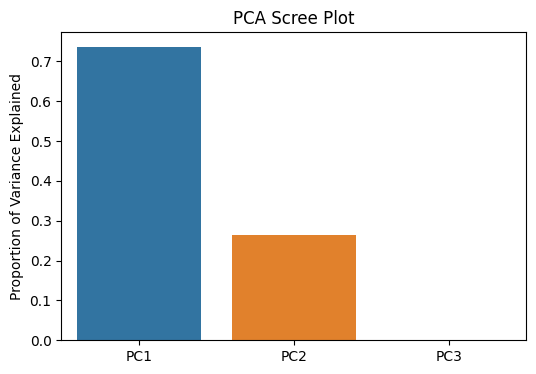

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate dealer-level metrics
dealer_metrics = df.groupby("Dealer_Name").agg(
    Total_Revenue=("Price ($)", "sum"),
    Units_Sold=("Car_id", "count"),
    Avg_Price=("Price ($)", "mean")
).reset_index()

# Step 2: Select features for PCA
features = ['Total_Revenue', 'Units_Sold', 'Avg_Price']
X = dealer_metrics[features]

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 5: Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:\n", explained_variance)

# Step 6: PCA Loadings
loadings = pd.DataFrame(
    pca.components_,
    columns=features,
    index=[f'PC{i+1}' for i in range(len(features))]
)
print("\nPCA Loadings (Feature Contributions):\n", loadings)

# Step 7: Scree plot
plt.figure(figsize=(6, 4))
sns.barplot(x=[f'PC{i+1}' for i in range(len(features))], y=explained_variance)
plt.ylabel("Proportion of Variance Explained")
plt.title("PCA Scree Plot")
plt.show()


In [41]:
total = 0.655 + 0.651 + 0.384
#Normalized Weights
Revenue = 0.655 / 1.69 
Units_Sold = 0.651 / 1.69 
Avg_Price = 0.384 / 1.69 
print(Revenue,Units_Sold,Avg_Price)

# Metric	Custom Weight
Revenue	0.45
Units Sold	0.45
Avg Price	0.10


Emphasize the top two metrics (Revenue + Units) almost equally

Downweight Avg Price (even though it still contributes, it's less critical)

In [43]:
query = """
WITH dealer_metrics AS (
    SELECT 
        Dealer_Name,
        COUNT(*) AS Sales_Volume,
        SUM("Price ($)") AS Total_Revenue,
        ROUND(AVG("Price ($)"), 2) AS Avg_Price
    FROM cars
    GROUP BY Dealer_Name
),

-- Normalize each metric (min-max scale 0-1)
min_max AS (
    SELECT 
        MIN(Sales_Volume) AS min_sales,
        MAX(Sales_Volume) AS max_sales,
        MIN(Total_Revenue) AS min_revenue,
        MAX(Total_Revenue) AS max_revenue,
        MIN(Avg_Price) AS min_price,
        MAX(Avg_Price) AS max_price
    FROM dealer_metrics
),
dealer_score AS (
    SELECT 
        d.Dealer_Name,
        d.Sales_Volume,
        d.Total_Revenue,
        d.Avg_Price,
        
        -- Min-max normalized metrics
        ROUND(1.0 * (d.Sales_Volume - m.min_sales) / NULLIF(m.max_sales - m.min_sales, 0), 3) AS norm_sales,
        ROUND(1.0 * (d.Total_Revenue - m.min_revenue) / NULLIF(m.max_revenue - m.min_revenue, 0), 3) AS norm_revenue,
        ROUND(1.0 * (d.Avg_Price - m.min_price) / NULLIF(m.max_price - m.min_price, 0), 3) AS norm_price
        
    FROM dealer_metrics d, min_max m
),

-- Weighted scoring formula
final_scores AS (
    SELECT 
        Dealer_Name,
        Sales_Volume,
        Total_Revenue,
        Avg_Price,
        ROUND(
            0.45 * norm_sales +
            0.45 * norm_revenue +
            0.1 * norm_price
        , 3) AS Performance_Score
    FROM dealer_score
)
SELECT *
FROM final_scores
ORDER BY Performance_Score DESC
LIMIT 10;
"""
table = pd.read_sql_query(query, conn)
table

,Dealer_Name,Sales_Volume,Total_Revenue,Avg_Price,Performance_Score
0,Rabun Used Car Sales,1313,37456655,28527.54,0.981
1,Progressive Shippers Cooperative Association No,1318,36751460,27884.26,0.927
2,U-Haul CO,1247,35876089,28769.92,0.919
3,Scrivener Performance Engineering,1246,35258525,28297.37,0.874
4,Race Car Help,1253,35288706,28163.37,0.871
5,Saab-Belle Dodge,1250,35220865,28176.69,0.868
6,Star Enterprises Inc,1249,35113206,28113.06,0.861
7,Tri-State Mack Inc,1249,35091357,28095.56,0.860
8,Suburban Ford,1243,34943473,28112.21,0.854
9,Ryder Truck Rental and Leasing,1248,34837906,27914.99,0.842


# 8. Visual Dashboards

* Monthly sales by region/dealer
* Car model popularity heatmap
* Price vs. income scatter plot
* Customer demographic breakdown
